#About Gesture.csv  
Gesture recognition is a computer vision task.
Goal of this task is to recognise Sign Language Gesture.
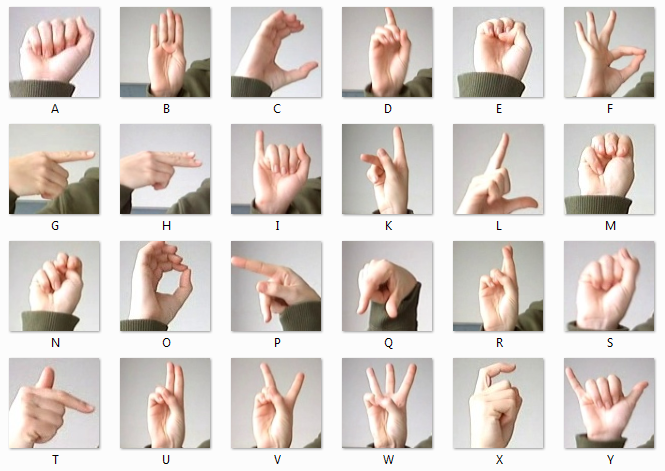

Gesture.csv file has 696 rows corresponding to 24 english apphabets and 29 images from each class (i.e. 24 x 29 =696)  
Each image is of size 25 x 25 pixels,,that is why in the csv file each row has 625 values.

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np

In [4]:
# read .csv file
df=pd.read_csv('gesture.csv')
X=df.iloc[:,1:].values  #input
Y=df['Target'] #output
#df.head()

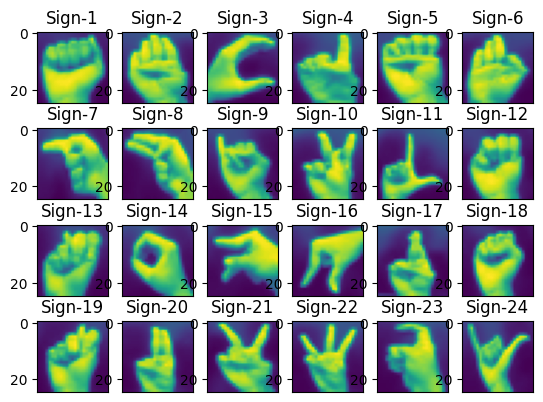

In [17]:
#Run this cell to see 24sample images
for i in range(24):
    k=(i)*29
    I=X[k,:]
    Class=Y[k]
    II=np.reshape(I,[25,25])
    plt.subplot(4,6,i+1)
    plt.imshow(II.T)
    plt.xticks([])
    plt.title('Sign-'+str(Class))
    plt.show

## 1. Write python code to check the performance of SVC model

In [9]:
#Write your SVC code here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
df=pd.read_csv('gesture.csv')
df.head()

,Target,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h616,h617,h618,h619,h620,h621,h622,h623,h624,h625
0,1,53,50,48,46,44,42,41,40,39,...,28,26,23,22,21,21,22,22,22,22
1,1,26,24,24,24,23,23,23,23,25,...,36,30,26,23,21,20,19,18,17,17
2,1,58,55,53,52,49,44,38,32,27,...,24,20,17,15,14,14,14,14,15,16
3,1,41,36,33,31,29,27,26,25,24,...,23,22,21,19,18,16,15,15,15,15
4,1,21,20,19,18,19,19,17,17,23,...,16,16,15,15,14,14,14,14,14,14


In [10]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
#splitting the datasets into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#Creating and training the model
clf=SVC(kernel='linear',C=1,random_state=42)
clf.fit(x_train,y_train)
#Making predictions on the test data
y_pred=clf.predict(x_test)
#Evaluating the model
accuracy=accuracy_score(y_test,y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

#Calculate confusion matrix
confusion=confusion_matrix(y_test,y_pred)
# Find the gesture with maximum error
errors = confusion.diagonal(0).sum()
max_error_gesture = Y[errors.argmax()]

# Find the two classes with maximum confusion
max_confusion = confusion.max()
class1, class2 = (confusion == max_confusion).nonzero()
print("Gesture with maximum error:", max_error_gesture)
print("Classes with maximum confusion:", Y[class1[0]], "and", Y[class2[0]])


Accuracy: 0.8857142857142857
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5
           5       0.83      0.71      0.77         7
           6       1.00      0.67      0.80         6
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         5
          10       1.00      0.71      0.83         7
          11       1.00      1.00      1.00         6
          12       0.62      0.71      0.67         7
          13       0.50      0.75      0.60         4
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         3
          17       0.75      

1. Which gesture has maximum error?
2. Confusion is maximum between which 2-classes?

#2.Write python code to check the performance of MLP model

In [16]:
#Write your MLP code here
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1, test_size=0.2)
#Scaling the data
sc= StandardScaler()
X_trainscaled=sc.fit_transform(X_train)
X_testscaled=sc.transform(X_test)
#Creating and training the model
clf = MLPClassifier(hidden_layer_sizes=(5,3),activation="relu",random_state=1).fit(X_trainscaled, y_train)
#Making predictions on the test data
y_Pred=clf.predict(X_testscaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_Pred)
classification_report = classification_report(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)
print(clf.score(X_testscaled, y_test))

Accuracy: 0.34285714285714286
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.18      0.29      0.22         7
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         8
          16       0.33      0.20      0.25         5
          17       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
